# Load, clean, and display data

In [1823]:
# !pip install arch             # uncomment for installing the arch package
import numpy as np
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

In [1824]:
# Read data file

df = pd.read_excel('/Users/jinhyun/Documents/GitHub/Python/assignment/assignmentsmodelvalidatortradingriskmodelsating/1. IndexData.xls') # imports the data
display(df)

,Date,DAX,SMI
0,2007-03-30,6917.03,8976.99
1,2007-04-02,6937.17,8956.31
2,2007-04-03,7045.56,9053.95
3,2007-04-04,7073.91,9057.62
4,2007-04-05,7099.91,9099.08
...,...,...,...
780,2010-03-26,6120.05,6838.95
781,2010-03-29,6156.85,6850.58
782,2010-03-30,6142.45,6871.42
783,2010-03-31,6153.55,6873.37


Now we transform the data 

In [1825]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # transform date strings to datetime 
df = df.set_index(['Date']) # set index of DataFrame to the date column

In [1826]:
df['R_DAX'] = np.log(df[['DAX']]) - np.log(df[['DAX']]).shift(1) # calculate DAX returns
df['R_SMI'] = np.log(df[['SMI']]) - np.log(df[['SMI']]).shift(1) # calculate SMI returns
df = df.dropna() # drop N/A entries

R_DAX =  (df['R_DAX'])['2007-03-30':] # remove first row from returns 
R_SMI =  (df['R_SMI'])['2007-03-30':] 

df['DAX_eur'] =  df[['DAX']]*500 # find the value of indices
df['SMI_eur'] =  df[['SMI']]*450 

display(df)


,DAX,SMI,R_DAX,R_SMI,DAX_eur,SMI_eur
Date,,,,,,
2007-04-02,6937.17,8956.31,0.002907,-0.002306,3468585.0,4030339.5
2007-04-03,7045.56,9053.95,0.015504,0.010843,3522780.0,4074277.5
2007-04-04,7073.91,9057.62,0.004016,0.000405,3536955.0,4075929.0
2007-04-05,7099.91,9099.08,0.003669,0.004567,3549955.0,4094586.0
2007-04-06,7099.91,9099.08,0.000000,0.000000,3549955.0,4094586.0
...,...,...,...,...,...,...
2010-03-26,6120.05,6838.95,-0.002106,-0.008042,3060025.0,3077527.5
2010-03-29,6156.85,6850.58,0.005995,0.001699,3078425.0,3082761.0
2010-03-30,6142.45,6871.42,-0.002342,0.003037,3071225.0,3092139.0


Display a line graph of the returns,

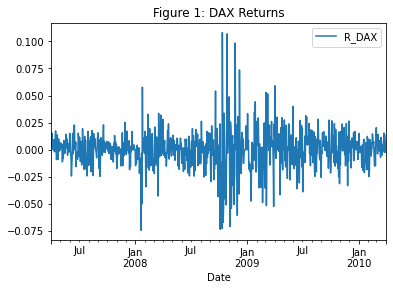

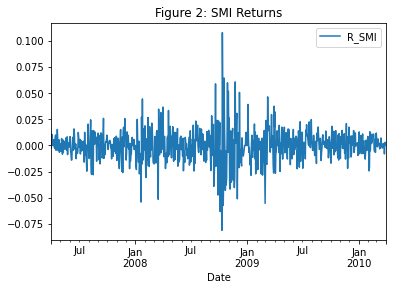

Skewness
DAX : 0.25802976832123947 / SMI: 0.18726592410554285
Kurtosis
DAX : 6.460467916791626 / SMI: 6.327211792289833


In [1827]:
# line graph of the returns
R_DAX.plot()
plt.title('Figure 1: DAX Returns')
plt.legend(['R_DAX'])
plt.show()

R_SMI.plot()
plt.title('Figure 2: SMI Returns')
plt.legend(['R_SMI'])
plt.show()

# Calculate the skewness and kurtosis of the returns.

# returns the skewness of a series
print("Skewness")
print('DAX :', R_DAX .skew(),'/ SMI:',R_SMI.skew())

# returns the excess kurtosis of a series
print("Kurtosis")
print('DAX :',R_DAX.kurtosis() ,'/ SMI:',R_SMI.kurtosis()) 


a)	Estimate the 1-day 99% VaR of both portfolios (individually) on the situation date 1 April 2010 using the Normal VaR approach. 

In [1828]:
# the pth quantile of the normal distribution 
p=0.01
pquantile_norm = stats.norm.ppf(p)


# Obtain the 'VaR forecasts' and compute the 'percentage of exceedences'. 
price_DAX = 500
price_SMI = 450
quantity_DAX = df['DAX'].iloc[-1]
quantity_SMI = df['SMI'].iloc[-1]

c_DAX = np.std(R_DAX) # a constantseries / cons_std = R*0 + c
c_SMI = np.std(R_SMI) 

VaR_forecast_norm_DAX = -price_DAX * quantity_DAX * c_DAX * stats.norm.ppf(p)
VaR_forecast_norm_SMI = -price_SMI * quantity_SMI * c_SMI *stats.norm.ppf(p)
print('DAX, 99% VaR (Normal distribution):', str(round(VaR_forecast_norm_DAX*100,2)), 'euro') 
print('SMI, 99% VaR (Normal distribution):', str(round(VaR_forecast_norm_SMI*100,2)), 'euro')
print('DAX, 99% maximum loss(%):', str(-round(c_DAX * stats.norm.ppf(p)*100,2)),'%') 
print('SMI, 99% maximum loss(%):', str(-round( c_SMI *stats.norm.ppf(p)*100,2)),'%')



DAX, 99% VaR (Normal distribution): 12951871.44 euro
SMI, 99% VaR (Normal distribution): 11098421.33 euro
DAX, 99% maximum loss(%): 4.15 %
SMI, 99% maximum loss(%): 3.58 %


b)	Explain if the assumption of normally distributed returns is valid. 

In [1829]:
print('DAX :', stats.jarque_bera(R_DAX))
print('SMI :', stats.jarque_bera(R_SMI))

DAX : Jarque_beraResult(statistic=1351.5881129202228, pvalue=0.0)
SMI : Jarque_beraResult(statistic=1292.5938610563617, pvalue=0.0)


Jarque-Bera test is designed to test the normality (goodness of fit test). The test statistic for JB test with p = 99.5% is 10.597.

The actual result of the DAX return is larger than JB test statistic. (1345.2635 > 10.597)
The actual result of the SMI return is larger than JB test statistic. (1286.1795 > 10.597)
The p values from two types of returns are also significant (p < 0.01)

Therefore we can conclude that the assumption of normally distributed reuturn is not valid


c)	Estimate the 1-day 99% VaR for both portfolios (individually) on the situation date 1 April 2010 using the Historical Simulation approach. 

In [1830]:
historic_var_DAX = - price_DAX * quantity_DAX * np.percentile(R_DAX, 1, interpolation='lower')
historic_var_SMI = - price_DAX * quantity_DAX * np.percentile(R_SMI, 1, interpolation='lower')

print(f'The historical DAX 99% VaR is {str(round(historic_var_DAX,2)*100)}')
print(f'The historical SMI 99% VaR is {str(round(historic_var_SMI,2)*100)}')
print("")
print('DAX, 99% maximum loss(%):', str(-round(np.percentile(R_DAX, 1, interpolation='lower'),2)*100),'%') 
print('SMI, 99% maximum loss(%):', str(-round(np.percentile(R_SMI, 1, interpolation='lower'),2)*100),'%')

The historical DAX 99% VaR is 16820852.0
The historical SMI 99% VaR is 15890013.0

DAX, 99% maximum loss(%): 5.0 %
SMI, 99% maximum loss(%): 5.0 %


## 2 

a)	Estimate the 1-day 99% VaR of the consolidated portfolio for the situation date 1 April 2010 using the Normal Variance-Covariance VaR approach. 

In [1831]:
# Declare Empty Lists
Mean = []
STD = []

#Calculate DEAR
ticker_R = ['R_DAX', 'R_SMI']
value = df[['DAX', 'SMI']].iloc[-1]

for i in range(2):
    v = np.std(df[ticker_R[i]])              # Standard Error
    mean = np.mean(df[ticker_R[i]])          # Mean 

    # Append those values in lists
    Mean.append(mean)
    STD.append(v)

In [1832]:
# Construct new Table
dear = pd.DataFrame({'Mean': Mean, 'STD': STD}, index = ['R_DAX','R_SMI'])
display(dear)

,Mean,STD
R_DAX,-0.000132,0.017857
R_SMI,-0.000338,0.015389


In [1833]:
# Correlation Coefficient
rho = df[['R_DAX','R_SMI']].corr() # find the correlation of two returns
display(rho)

# Instead of price data, we apply return data to get the correlation coefficient among stocks. 
# By doing so, we would avoid Spurious Regression and compute correct coefficient.


,R_DAX,R_SMI
R_DAX,1.000000,0.818536
R_SMI,0.818536,1.000000


In [1834]:
# concatenate dear and rho
portfolio = pd.concat([dear, rho,], axis = 1) 
display(portfolio)

,Mean,STD,R_DAX,R_SMI
R_DAX,-0.000132,0.017857,1.000000,0.818536
R_SMI,-0.000338,0.015389,0.818536,1.000000


In [1835]:
# calculate weights of each portfolio (based on latest figures)
w_DAX = df['DAX_eur'].iloc[-1]/(df['DAX_eur'].iloc[-1] + df['SMI_eur'].iloc[-1])
w_SMI = df['SMI_eur'].iloc[-1]/(df['DAX_eur'].iloc[-1] + df['SMI_eur'].iloc[-1])
 
quantity_DAX = df['DAX'].iloc[-1]
quantity_SMI = df['SMI'].iloc[-1]


# define variables
std_DAX = portfolio.at['R_DAX','STD'] # standard deviation
std_SMI = portfolio.at['R_SMI','STD']
corr = portfolio.at['R_DAX','R_SMI'] # correlation

# calculate the variance and volatility of the consolidated portfolio
var_port_consol = w_DAX**2*std_DAX**2 + w_SMI**2*std_SMI**2 + 2*(w_DAX*w_SMI*std_DAX*std_SMI*corr) # variance
vol_port_consol = var_port_consol**(1/2) # volatility


def rel_VaR(p1,q1,w1,p2,q2,w2,sigma,Quantile):
    """
    Relative VaR
    """
    return (p1*q1*w1 + p2*q2*w2) * sigma * stats.norm.ppf(Quantile)

# print(f'Variance of consolidate portfolio is {str(round(var_port_consol,4))}')
# print(f'Volatility of consolidate portfolio is {str(round(vol_port_consol,4))}')

Var_port_norm = str(round(rel_VaR(500,quantity_DAX, w_DAX,450,quantity_SMI,w_SMI,vol_port_consol,0.99),2))
print(f'99% relative VaR of consolidate portfolio is {Var_port_norm} euro')
print('Rel Portfolio, 99% maximum loss(%):', str(round(vol_port_consol * stats.norm.ppf(0.99)*100,4)),'%')


99% relative VaR of consolidate portfolio is 114701.35 euro
Rel Portfolio, 99% maximum loss(%): 3.6894 %


Interpretation

According to above calculation, we conclude that maximum loss of the portfolio in one day would not exceed 114701.35 euros at 99 percent chance. However, market always fluctuates. Hence, keeping the calculation of VaR regularly would make our judgement more accurately.

b)	Estimate the 1-day 99% VaR of the consolidated portfolio for the situation date 1 April 2010 using the Historical Simulation approach. 

In [1836]:
df['portf_eur'] = w_DAX*df['DAX'] + w_SMI*df['SMI'] # add value of consolidated portfolio
df['R_portf'] = w_DAX*df['R_DAX'] + w_SMI*df['R_SMI'] # add return of consolidated portfolio

In [1837]:
port_value = 500*quantity_DAX*w_DAX +450*quantity_SMI*w_SMI # use today's portfolio value

quantile = 0.01 # set qunatile
daily_return_rates = df['R_portf'].sort_values().reset_index(drop=True) # sort values of consolidated portfolio returns
xth = int(np.floor(quantile*len(daily_return_rates))) - 1 # find the index with given a quantile
xth_smallest_rate = daily_return_rates[xth] # 99% VaR
mean_return_rate = daily_return_rates.mean() # calculate the average return of consolidated portfolio

# get the VaR
rel_VaR = port_value * (mean_return_rate - xth_smallest_rate) # relative VaR
# abs_VaR = port_value * -xth_smallest_rate # absolute VaR

print(f'Relative 99% VaR is {str(round(rel_VaR,4))} euro')
# print(f'Absolute 99% VaR is {str(round(abs_VaR,4))} euro')
print('Rel Portfolio, 99% maximum loss(%):', str(round(mean_return_rate - xth_smallest_rate,4)*100),'%') 
# print('Abs Portfolio, 99% maximum loss(%):', str(round(-xth_smallest_rate,4)*100),'%') 

Relative 99% VaR is 172768.0682 euro
Rel Portfolio, 99% maximum loss(%): 5.56 %


Summary of result

In [1838]:
print('<< Individual >>')
print('')
print('< Normal VaR >')
print('')
print('DAX, 99% VaR:', str(round(VaR_forecast_norm_DAX*100,2)), 'euro') 
print('SMI, 99% VaR:', str(round(VaR_forecast_norm_SMI*100,2)), 'euro')
print('DAX, 99% maximum loss(%):', str(-round(c_DAX * stats.norm.ppf(p)*100,2)),'%') 
print('SMI, 99% maximum loss(%):', str(-round( c_SMI *stats.norm.ppf(p)*100,2)),'%')
print('')
print("< Historic simulation VaR >")
print("")
print(f'DAX, 99% VaR is {str(round(historic_var_DAX,2)*100)} euro')
print(f'SMI, 99% VaR is {str(round(historic_var_SMI,2)*100)} euro')
print('DAX, 99% maximum loss(%):', str(-round(np.percentile(R_DAX, 1, interpolation='lower'),2)*100),'%') 
print('SMI, 99% maximum loss(%):', str(-round(np.percentile(R_SMI, 1, interpolation='lower'),2)*100),'%')
print('')
print('<< Portfolio>>')
print('')
print('< Normal VaR >')
print('Portfolio, 99% VaR is', Var_port_norm,'euro')
print('Portfolio, 99% maximum loss(%):', str(round(vol_port_consol * stats.norm.ppf(0.99)*100,4)),'%')
print('')
print('< Historic simulation VaR >')
print('')
print(f'Portfolio, 99% VaR is {str(round(rel_VaR,4))} euro')
print('Portfolio, 99% maximum loss(%):', str(round(mean_return_rate - xth_smallest_rate,4)*100),'%') 

<< Individual >>

< Normal VaR >

DAX, 99% VaR: 12951871.44 euro
SMI, 99% VaR: 11098421.33 euro
DAX, 99% maximum loss(%): 4.15 %
SMI, 99% maximum loss(%): 3.58 %

< Historic simulation VaR >

DAX, 99% VaR is 16820852.0 euro
SMI, 99% VaR is 15890013.0 euro
DAX, 99% maximum loss(%): 5.0 %
SMI, 99% maximum loss(%): 5.0 %

<< Portfolio>>

< Normal VaR >
Portfolio, 99% VaR is 114701.35 euro
Portfolio, 99% maximum loss(%): 3.6894 %

< Historic simulation VaR >

Portfolio, 99% VaR is 172768.0682 euro
Portfolio, 99% maximum loss(%): 5.56 %


c)	Compare the consolidated VaR figures to the sum of individual portfolio VaRs. Can you explain the difference? How large is the diversification effect for each of the VaR models?

# 3

a)	Compute for each day from 2 January 2001 – 1 April 2010, i.e. the backtest period, the portfolio value and the daily portfolio PnL using the overnight index returns.

In [1839]:
df2 = pd.read_excel('/Users/jinhyun/Documents/GitHub/Python/assignment/assignmentsmodelvalidatortradingriskmodelsating/1. IndexData.xls', sheet_name='Sheet2') # imports the data
display(df2)

,Date,SX5E
0,2000-01-03,4849.22
1,2000-01-04,4657.83
2,2000-01-05,4541.75
3,2000-01-06,4500.69
4,2000-01-07,4648.27
...,...,...
2669,2010-03-26,2940.94
2670,2010-03-29,2947.49
2671,2010-03-30,2939.68
2672,2010-03-31,2931.16


In [1840]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d') # transform date strings to datetime 
df2 = df2.set_index(['Date']) # set index of DataFrame to the date column
display(df2)

,SX5E
Date,
2000-01-03,4849.22
2000-01-04,4657.83
2000-01-05,4541.75
2000-01-06,4500.69
2000-01-07,4648.27
...,...
2010-03-26,2940.94
2010-03-29,2947.49
2010-03-30,2939.68


In [1841]:
df2['R_SX5E'] = np.log(df2[['SX5E']]) - np.log(df2[['SX5E']]).shift(1) # calculate SX5E returns
display(df2)
# df2 = df2.dropna() # drop nan values


,SX5E,R_SX5E
Date,,
2000-01-03,4849.22,NaN
2000-01-04,4657.83,-0.040268
2000-01-05,4541.75,-0.025237
2000-01-06,4500.69,-0.009082
2000-01-07,4648.27,0.032264
...,...,...
2010-03-26,2940.94,-0.002428
2010-03-29,2947.49,0.002225
2010-03-30,2939.68,-0.002653


In [1842]:
df2['R_SX5E_cumprod']   = (df2['R_SX5E']+1).cumprod() # add cumulative return of SX5E
df2['R_SX5E_port_val']  = df2['R_SX5E_cumprod']*10**6 # add portfolio value
df2['R_SX5E_daily_PnL'] = df2['R_SX5E'] * df2['R_SX5E_port_val']
# df2 = df2.dropna()
display(df2)

,SX5E,R_SX5E,R_SX5E_cumprod,R_SX5E_port_val,R_SX5E_daily_PnL
Date,,,,,
2000-01-03,4849.22,NaN,NaN,NaN,NaN
2000-01-04,4657.83,-0.040268,0.959732,959731.807172,-38646.665474
2000-01-05,4541.75,-0.025237,0.935511,935510.792484,-23609.742302
2000-01-06,4500.69,-0.009082,0.927015,927014.780976,-8418.853433
2000-01-07,4648.27,0.032264,0.956924,956924.346486,30874.579366
...,...,...,...,...,...
2010-03-26,2940.94,-0.002428,0.435248,435248.018574,-1056.888779
2010-03-29,2947.49,0.002225,0.436216,436216.315963,970.451563
2010-03-30,2939.68,-0.002653,0.435059,435058.934258,-1154.310907


b)	Compute for each day from the backtest period the Normal 1-day 99% VaR. Use for each situation date the most recent history of 260 daily returns to re-estimate the mean and the standard deviation of the returns. The data in the first year are provided to initialize the estimation.

In [1843]:
df2['std_SX5E_260']  = df2['R_SX5E'].rolling(260).std() # add standard deviations of 260 daily returns 
df2['mean_SX5E_260'] = df2['R_SX5E'].rolling(260).mean() # add means of 260 daily returns 
df2['1%q_SX5E_260']  = df2['R_SX5E'].rolling(260).quantile(.01, interpolation='lower') # add 1% quantile of 260 daily returns
display(df2)

,SX5E,R_SX5E,R_SX5E_cumprod,R_SX5E_port_val,R_SX5E_daily_PnL,std_SX5E_260,mean_SX5E_260,1%q_SX5E_260
Date,,,,,,,,
2000-01-03,4849.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4657.83,-0.040268,0.959732,959731.807172,-38646.665474,NaN,NaN,NaN
2000-01-05,4541.75,-0.025237,0.935511,935510.792484,-23609.742302,NaN,NaN,NaN
2000-01-06,4500.69,-0.009082,0.927015,927014.780976,-8418.853433,NaN,NaN,NaN
2000-01-07,4648.27,0.032264,0.956924,956924.346486,30874.579366,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2010-03-26,2940.94,-0.002428,0.435248,435248.018574,-1056.888779,0.014499,0.001261,-0.035257
2010-03-29,2947.49,0.002225,0.436216,436216.315963,970.451563,0.014109,0.001471,-0.034222
2010-03-30,2939.68,-0.002653,0.435059,435058.934258,-1154.310907,0.014002,0.001347,-0.034222


In [1844]:
# the pth quantile of the normal distribution 
p=0.01
df2['VaR_SX5E_Normal'] = - df2['R_SX5E_port_val'] * df2['std_SX5E_260'] * stats.norm.ppf(p)
display(df2)

,SX5E,R_SX5E,R_SX5E_cumprod,R_SX5E_port_val,R_SX5E_daily_PnL,std_SX5E_260,mean_SX5E_260,1%q_SX5E_260,VaR_SX5E_Normal
Date,,,,,,,,,
2000-01-03,4849.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4657.83,-0.040268,0.959732,959731.807172,-38646.665474,NaN,NaN,NaN,NaN
2000-01-05,4541.75,-0.025237,0.935511,935510.792484,-23609.742302,NaN,NaN,NaN,NaN
2000-01-06,4500.69,-0.009082,0.927015,927014.780976,-8418.853433,NaN,NaN,NaN,NaN
2000-01-07,4648.27,0.032264,0.956924,956924.346486,30874.579366,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2010-03-26,2940.94,-0.002428,0.435248,435248.018574,-1056.888779,0.014499,0.001261,-0.035257,14680.862270
2010-03-29,2947.49,0.002225,0.436216,436216.315963,970.451563,0.014109,0.001471,-0.034222,14317.811472
2010-03-30,2939.68,-0.002653,0.435059,435058.934258,-1154.310907,0.014002,0.001347,-0.034222,14171.200596


c)	Compute on each day from the backtest period the Historical 1-day 99% VaR. Use for each situation date the most recent history of 260 daily returns to re-estimate the 1% quantile of the return distribution. 

In [1845]:
df2['VaR_SX5E_Hist'] = - df2['R_SX5E_port_val'] * df2['1%q_SX5E_260'] # add column of Historical 1-day 99% VaR.
display(df2)

,SX5E,R_SX5E,R_SX5E_cumprod,R_SX5E_port_val,R_SX5E_daily_PnL,std_SX5E_260,mean_SX5E_260,1%q_SX5E_260,VaR_SX5E_Normal,VaR_SX5E_Hist
Date,,,,,,,,,,
2000-01-03,4849.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4657.83,-0.040268,0.959732,959731.807172,-38646.665474,NaN,NaN,NaN,NaN,NaN
2000-01-05,4541.75,-0.025237,0.935511,935510.792484,-23609.742302,NaN,NaN,NaN,NaN,NaN
2000-01-06,4500.69,-0.009082,0.927015,927014.780976,-8418.853433,NaN,NaN,NaN,NaN,NaN
2000-01-07,4648.27,0.032264,0.956924,956924.346486,30874.579366,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2010-03-26,2940.94,-0.002428,0.435248,435248.018574,-1056.888779,0.014499,0.001261,-0.035257,14680.862270,15345.652283
2010-03-29,2947.49,0.002225,0.436216,436216.315963,970.451563,0.014109,0.001471,-0.034222,14317.811472,14928.108632
2010-03-30,2939.68,-0.002653,0.435059,435058.934258,-1154.310907,0.014002,0.001347,-0.034222,14171.200596,14888.500944


d)	Plot the realized portfolio PnL over time against the associated Normal and Historical VaR. Make sure that you compare the next day PnL against today’s VaR. 

In [1846]:
df3 = df2.dropna().iloc[1:]
display(df3) 

,SX5E,R_SX5E,R_SX5E_cumprod,R_SX5E_port_val,R_SX5E_daily_PnL,std_SX5E_260,mean_SX5E_260,1%q_SX5E_260,VaR_SX5E_Normal,VaR_SX5E_Hist
Date,,,,,,,,,,
2001-01-02,4701.68,-0.014927,0.944039,944039.390033,-14091.993153,0.014126,0.000036,-0.033880,31022.083785,31984.466076
2001-01-03,4660.48,-0.008801,0.935730,935730.479707,-8235.779913,0.014049,0.000099,-0.033880,30581.487871,31702.956572
2001-01-04,4752.71,0.019597,0.954068,954067.554381,18696.417792,0.014089,0.000210,-0.033880,31269.920580,32324.224656
2001-01-05,4734.48,-0.003843,0.950401,950400.994963,-3652.468531,0.013949,0.000071,-0.033880,30840.377498,32200.000024
2001-01-08,4711.31,-0.004906,0.945738,945738.423549,-4639.697309,0.013925,-0.000002,-0.033880,30636.665410,32042.030072
...,...,...,...,...,...,...,...,...,...,...
2010-03-26,2940.94,-0.002428,0.435248,435248.018574,-1056.888779,0.014499,0.001261,-0.035257,14680.862270,15345.652283
2010-03-29,2947.49,0.002225,0.436216,436216.315963,970.451563,0.014109,0.001471,-0.034222,14317.811472,14928.108632
2010-03-30,2939.68,-0.002653,0.435059,435058.934258,-1154.310907,0.014002,0.001347,-0.034222,14171.200596,14888.500944


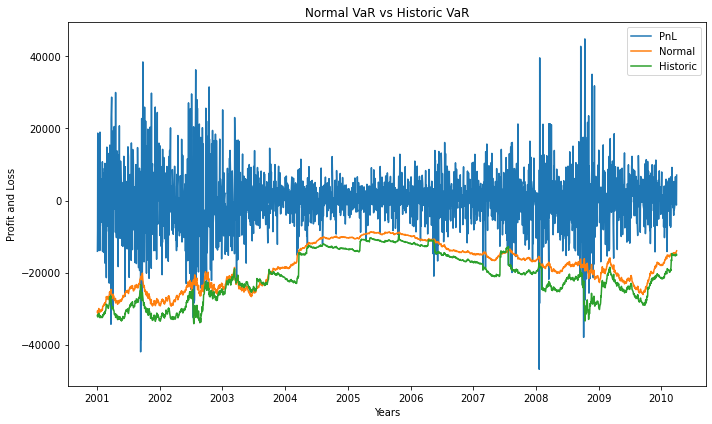

In [1847]:
plt.figure(figsize=(10,6), tight_layout=True)
plt.plot(df3['R_SX5E_daily_PnL'], label = "PnL")
plt.plot(-df3['VaR_SX5E_Normal'], label = "Normal")
plt.plot(-df3['VaR_SX5E_Hist'], label = "Historic")
plt.xlabel('Years')
plt.ylabel('Profit and Loss')
plt.title('Normal VaR vs Historic VaR')
plt.legend(labels=['PnL',"Normal","Historic" ])
plt.show()

e)	For each of the two VaR models, compute the realized number of VaR exceptions. What is the expected number of exceptions? Which of the two models performs best?

In [1848]:

PnL = df3['R_SX5E_daily_PnL']
Nor = df3['VaR_SX5E_Normal']
Hist = df3['VaR_SX5E_Hist']

# hit series

# Normal VaR
hit_series_norm = np.where(PnL < -Nor , 1, 0) # Create a hit series. 1: if R < -VaR_forecast
per_exceed_norm = sum(hit_series_norm)/len(hit_series_norm)   # Calculate the percentage of exceedence.
print('Normal VaR, Percentage of exceedence:', str(round(per_exceed_norm *100,4)),'%')

# Historic simulation VaR
hit_series_hist = np.where(PnL < -Hist , 1, 0) # Create a hit series. 1: if R < -VaR_forecast
per_exceed_hist = sum(hit_series_hist)/len(hit_series_hist)   # Calculate the percentage of exceedence.
print('Historic simulation VaR, Percentage of exceedence :', str(round(per_exceed_hist *100,4)),'%')


Normal VaR, Percentage of exceedence: 2.1136 %
Historic simulation VaR, Percentage of exceedence : 0.6631 %


Historic simulation method works better. This method does not require any assumptions on risk factors distributions. Therefore Historic simulation worked better when there is uncertainty of ditribution. 
Since the distribution assumption is not required, it is easy to revalute full portfolio based on scenery data